In [1]:
import numpy as np
import random

patterns = []
classes = []

filename = 'Iris_data.txt'
file = open(filename, 'r')

for line in file.readlines():
    row = line.strip().split(',')
    if len(row) == 5:
        patterns.append(row[0:4])
        classes.append(row[4])
    else:
        print(f"Skipping line due to incorrect format: {line}")
print("Iris Data Loaded")
file.close()

patterns = np.asarray(patterns, dtype=np.float32)

sample_no = random.randint(0, len(patterns) - 1)

print("Sample pattern: " + str(patterns[sample_no]))
print("Class of the above pattern: " + str(classes[sample_no]))

Skipping line due to incorrect format: 

Iris Data Loaded
Sample pattern: [7.7 3.8 6.7 2.2]
Class of the above pattern: Iris-virginica


In [2]:
def mapunits(input_len,size='small'):
    
    heuristic_map_units = 5*input_len**0.54321
     
    if size == 'big':
        heuristic_map_units = 4*(heuristic_map_units)
    else:
        heuristic_map_units = 0.25*(heuristic_map_units)
        
    return heuristic_map_units
        
        
map_units = mapunits(len(patterns),size='big')
print("Heuristically computed appropriate no. of map units: "+str(int(map_units)))

Heuristically computed appropriate no. of map units: 304


In [3]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

def Eucli_dists(MAP,x):
    x = x.reshape((1,1,-1))
    Eucli_MAP = MAP - x
    Eucli_MAP = Eucli_MAP**2
    Eucli_MAP = np.sqrt(np.sum(Eucli_MAP,2))
    return Eucli_MAP

input_dimensions = 4

map_width = 9
map_height = 5
MAP = np.random.uniform(size=(map_height,map_width,input_dimensions))
prev_MAP = np.zeros((map_height,map_width,input_dimensions))

radius0 = max(map_width,map_height)/2
learning_rate0 = 0.1

coordinate_map = np.zeros([map_height,map_width,2],dtype=np.int32)

for i in range(0,map_height):
    for j in range(0,map_width):
        coordinate_map[i][j] = [i,j]

epochs = 500
radius=radius0
learning_rate = learning_rate0
max_iterations = len(patterns)+1
too_many_iterations = 10*max_iterations

convergence = [1]

timestep=1
e=0.001 
flag=0

epoch=0
while epoch<epochs:
    
    shuffle = np.random.randint(len(patterns), size=len(patterns))
    for i in range(len(patterns)):
        
        J = np.linalg.norm(MAP - prev_MAP)

        if  J <= e:
            flag=1
            break
            
        else:
            
            pattern = patterns[shuffle[i]]
            pattern_ary = np.tile(pattern, (map_height, map_width, 1))
            Eucli_MAP = np.linalg.norm(pattern_ary - MAP, axis=2)
            

            BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)

            prev_MAP = np.copy(MAP)
             
            for i in range(map_height):
                for j in range(map_width):
                    distance = np.linalg.norm([i - BMU[0], j - BMU[1]])
                    if distance <= radius:
                        MAP[i][j] = MAP[i][j] + learning_rate*(pattern-MAP[i][j])
            
            learning_rate = learning_rate0*(1-(epoch/epochs))
            radius = radius0*math.exp(-epoch/epochs)
            
            timestep+=1
    
    if J < min(convergence):
        print('Lower error found: %s' %str(J) + ' at epoch: %s' % str(epoch))
        print('\tLearning rate: ' + str(learning_rate))
        print('\tNeighbourhood radius: ' + str(radius))
        MAP_final = MAP
    convergence.append(J)
    
    if flag==1:
        break
    epoch+=1

Lower error found: 0.7626320615107757 at epoch: 0
	Learning rate: 0.1
	Neighbourhood radius: 4.5
Lower error found: 0.6510497439112304 at epoch: 1
	Learning rate: 0.0998
	Neighbourhood radius: 4.491008994002999
Lower error found: 0.38253173325144313 at epoch: 7
	Learning rate: 0.09860000000000001
	Neighbourhood radius: 4.437438949182878
Lower error found: 0.32761633922396294 at epoch: 18
	Learning rate: 0.0964
	Neighbourhood radius: 4.340881320674054
Lower error found: 0.21711294285718066 at epoch: 32
	Learning rate: 0.0936
	Neighbourhood radius: 4.221022497888282
Lower error found: 0.2163533671859945 at epoch: 79
	Learning rate: 0.0842
	Neighbourhood radius: 3.8423240188581675
Lower error found: 0.1300643366671196 at epoch: 93
	Learning rate: 0.08140000000000001
	Neighbourhood radius: 3.7362311774186967
Lower error found: 0.09720868441255977 at epoch: 208
	Learning rate: 0.05840000000000001
	Neighbourhood radius: 2.968561217179751
Lower error found: 0.06827738880247854 at epoch: 251
	

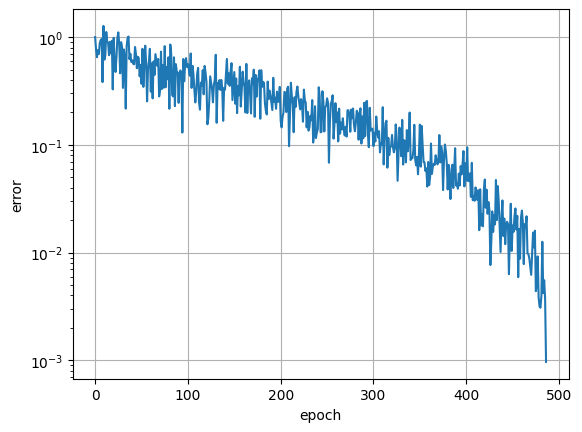

Number of timesteps: 72761
Final error: 0.0009669176588811728


In [4]:
plt.plot(convergence)
plt.ylabel('error')
plt.xlabel('epoch')
plt.grid(True)
plt.yscale('log')
plt.show()
print('Number of timesteps: ' + str(timestep))
print('Final error: ' + str(J))

Red = Iris-Setosa
Blue = Iris-Virginica
Green = Iris-Versicolor


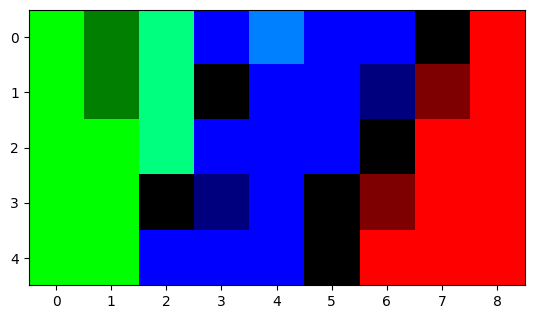

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 

result_map = np.zeros([map_height, map_width, 3], dtype=np.float32)

for i, pattern in enumerate(patterns):
    pattern_ary = np.tile(pattern, (map_height, map_width, 1))
    Eucli_MAP = np.linalg.norm(pattern_ary - MAP_final, axis=2)

    BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)
    
    x, y = BMU
    
    if classes[i] == 'Iris-setosa':
        if result_map[x][y][0] <= 0.5:
            result_map[x][y] += np.asarray([0.5, 0, 0])
    elif classes[i] == 'Iris-virginica':
        if result_map[x][y][1] <= 0.5:
            result_map[x][y] += np.asarray([0, 0.5, 0])
    elif classes[i] == 'Iris-versicolor':
        if result_map[x][y][2] <= 0.5:
            result_map[x][y] += np.asarray([0, 0, 0.5])

result_map = np.flip(result_map, 0)

print("Red = Iris-Setosa")
print("Blue = Iris-Virginica")
print("Green = Iris-Versicolor")

plt.imshow(result_map, interpolation='nearest')
plt.show()
